In [1]:
import pandas as pd
import sklearn.linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# Load training dataset
df1 = pd.read_csv('./bioresponse/train.csv')
#df1.head() # Visualize
#df1['D1'].plot() # Visualize
#df1['D2'].plot() # Visualize
df1.describe() # Visualize

# Load testing dataset
test = pd.read_csv('./bioresponse/test.csv')
# test.describe() # Visualize

# Separate labels from training dataset for fitting
labels = df1['Activity']
del df1['Activity']

In [3]:
# Fit a Logistic regression classifier
clf = sklearn.linear_model.LogisticRegression(max_iter=1000)
clf.fit(df1, labels)
nparr= clf.predict_proba(test)

# Predict with test set with classifier, format for Kaggle
submission = pd.DataFrame(nparr[:,1], columns = ['PredictedProbability'])
submission['MoleculeId'] = submission.index + 1
submission.describe()
#submission.to_csv('submission.csv',index = False)

,PredictedProbability,MoleculeId
count,2501.000000,2501.000000
mean,0.556739,1251.000000
std,0.355321,722.120835
min,0.000003,1.000000
25%,0.181918,626.000000
50%,0.639883,1251.000000
75%,0.902851,1876.000000
max,1.000000,2501.000000


## Kaggle Submission 1

First submission had a log loss score of 0.493 on leaderboard.

In [6]:
# 80/20 train test split
x_train, x_test, y_train, y_test = train_test_split(df1, labels, test_size=0.2)

# Fit a Logistic regression classifier
clf2 = sklearn.linear_model.LogisticRegression(max_iter=1000)
clf2.fit(x_train, y_train)
probs = clf2.predict_proba(x_test)
preds = clf2.predict(x_test)

Accuracy on internal test set:  0.7563249001331558


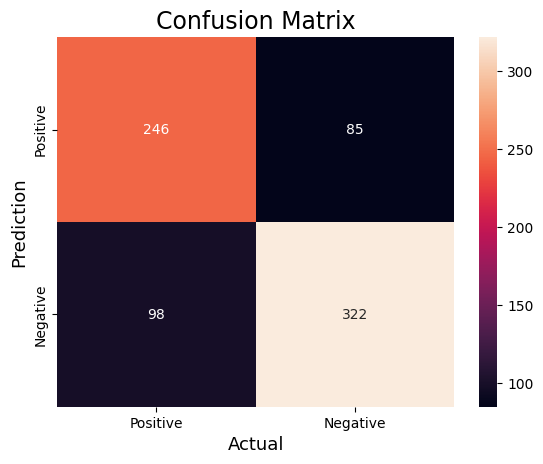

In [7]:
# Predict on internal test set
acc = accuracy_score(y_test, preds)
cm = confusion_matrix(y_test, preds)
print("Accuracy on internal test set: ",acc)

#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()